In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
df = pd.read_csv('./obs_flow.txt', sep=" ", header=None, names=('year','month','day','str_flw'), keep_date_col = True, parse_dates={'date':[0,1,2]})

**Data:**

In [3]:
obs = df[['date','str_flw']]  
obs = obs[(obs.date >= '1970-01-01') & (obs.str_flw != -9999) ]#take dates needed for comparison with model output and ignore -9999's
#obs['date']=pd.to_datetime(obs['date'],unit='D')
print(len(obs))

14121


**PLot data... notice the outliers**

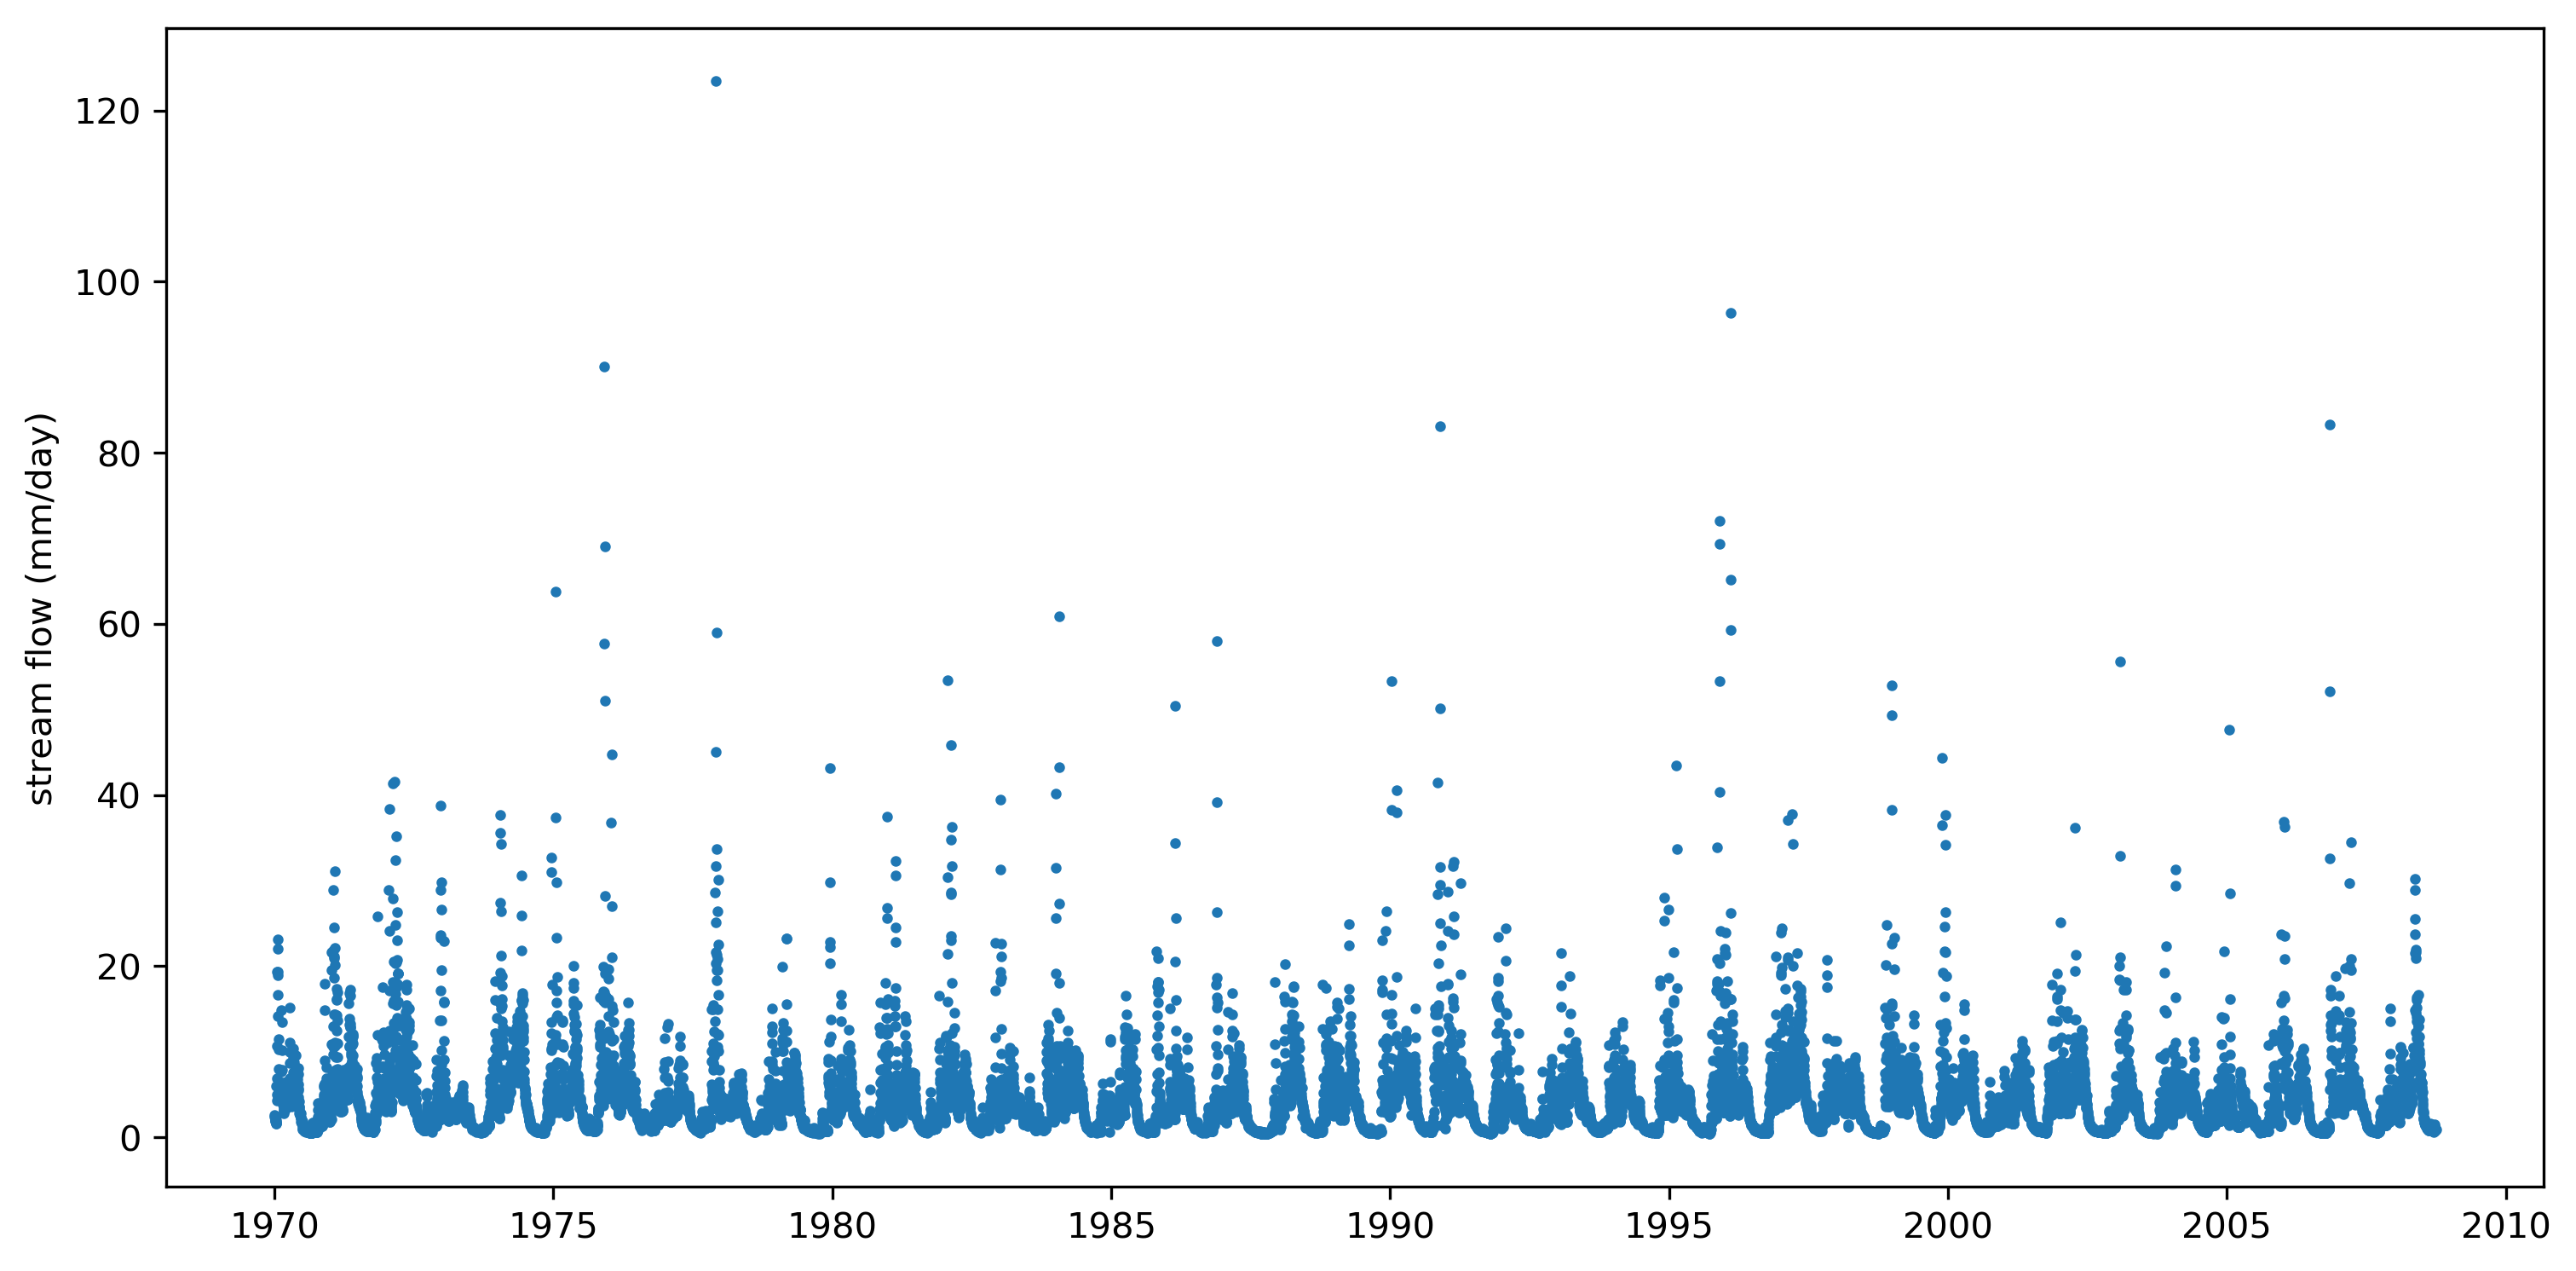

In [466]:
plt.figure(num=None, figsize=(12, 6), dpi=300, facecolor='w', edgecolor='k')
plt.plot(obs['date'],obs['str_flw'], 'o',markersize=2)
plt.ylabel('stream flow (mm/day)')
plt.show()

**Define stream flow**

In [4]:
sf = obs['str_flw']  #define sf - streamflow
sf = sf.reset_index(drop=True) 

**Calculate z**

In [14]:
mean = sf.mean() 
rmv_mean = sf - mean
std= np.std(rmv_mean)
sf = rmv_mean/std
print(max(sf))

22.876925570346593


**Check z - does mean=0 std=1?**

In [15]:
sf.mean() #yep! 

1.3735285206572825e-17

In [16]:
sf.std() #yep! 

1.0000354101379336

**Look at distribution... right skewed??**

C:\Users\Janie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


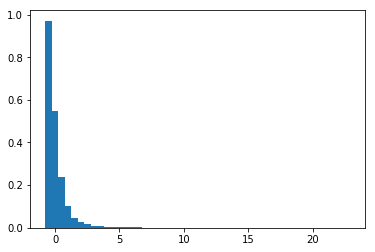

In [18]:
plt.hist(sf, bins=47, normed=True) #47 bins... 47 years of data separate daily data into bins
plt.show()

**Create arrays to fill and find delta**

In [19]:
a = np.arange(1.0,48.0,1) #a is an array of ranks that we will check if data falls within
print(len(a))
N = np.arange(1.0,48.0,1) #N is the number of points that fall within rank 
delta = (max(sf)-min(sf))/47 #delta used for calculation 

47


**Loop calculation - sort data into bins based on rank** 

In [20]:
#initialize i,n,j
i=0 
n=0
j=0
#for loop to find cumulative probability 
for i in range(47):
    n = 0
    a[i] = (min(sf))+((i)*delta)
    for j in range(len(sf)-1):
        if(sf[j]<a[i]):
            n=n+1
    N[i]=n    

**Calculate cumulative probability**

In [21]:
p = N/(len(sf)+1)
print(p)

[0.         0.48817448 0.76462257 0.88436482 0.93556154 0.95977907
 0.97259595 0.98102252 0.98605013 0.98959071 0.99178587 0.99306047
 0.99454751 0.99546806 0.99624699 0.99709673 0.9975216  0.99787566
 0.99801728 0.99822971 0.99844215 0.99872539 0.99893783 0.99907945
 0.99915026 0.99929189 0.99929189 0.99943351 0.99950432 0.99950432
 0.99950432 0.99950432 0.99964594 0.99964594 0.99964594 0.99971675
 0.99971675 0.99978757 0.99978757 0.99978757 0.99978757 0.99978757
 0.99978757 0.99978757 0.99978757 0.99978757 0.99978757]


**Calculated CDF plot**

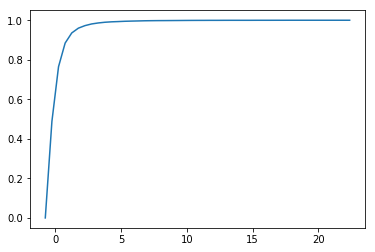

In [22]:
plt.plot(a,p)
plt.show()

**Using sciPy to calculate cdf**

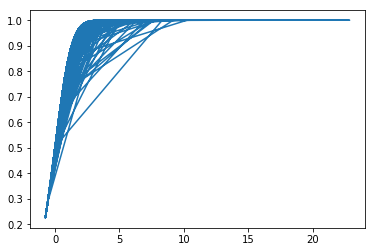

In [415]:
p = norm.cdf(sf)
plt.plot(sf,h)
plt.show()

**Using matplotlib histogram to calculate cdf**

C:\Users\Janie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


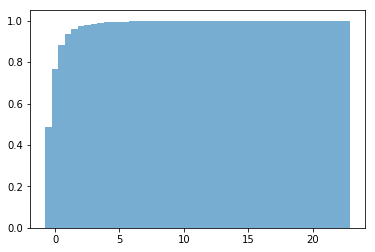

In [416]:
plt.hist(sf, bins=47, normed=True, cumulative=True, alpha=0.6) #47 bins... daily data ranked  into 47 bins
plt.show()